**Allianz AI Chatbot**
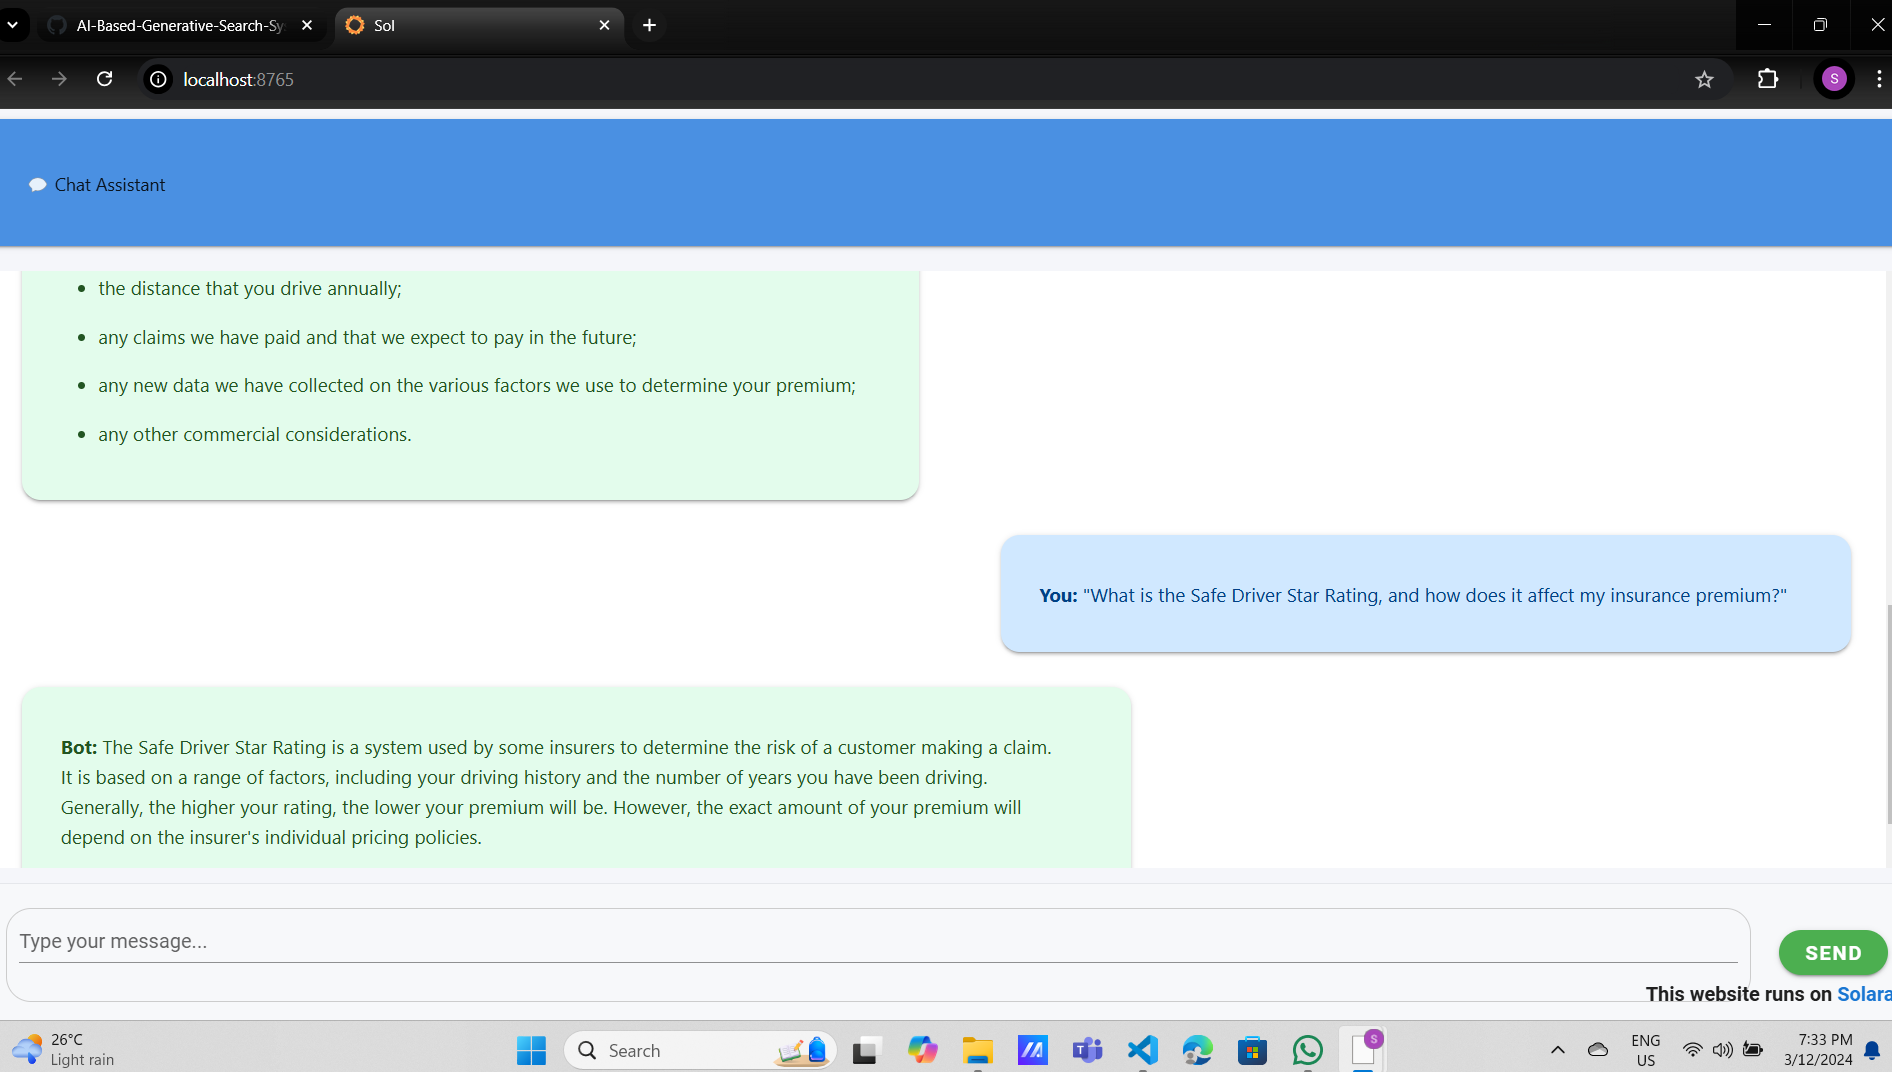

**Introduction**
This project leverages LangChain to create an AI-powered generative search system designed to efficiently answer questions from multiple PDF documents. Complex documents, like insurance policies, are often written in dense legal language, making it difficult for customers and agents to quickly find specific information. Traditional search methods are time-consuming, prone to errors, and often fail to provide reliable results.

To overcome these challenges, we are building a robust AI system capable of accurately answering context-specific questions directly from the text of multiple PDFs. This approach improves efficiency, accuracy, and accessibility in information retrieval, making it valuable across industries such as legal, financial, medical, and academic domains.

**Objective**
The main objective of this project is to develop a robust generative search system capable of effectively and accurately answering questions from various insurance policy documents, including multiple PDF files. Using frameworks like LangChain, the system is designed to efficiently retrieve and generate relevant responses from complex insurance policy texts.

As a practical implementation, we are building a chatbot specifically tailored for Allianz Car Insurance. This chatbot will provide users with an intuitive platform to pose context-aware questions and receive accurate, concise answers directly from the policy documents, enhancing customer experience and streamlining information retrieval.

**System Architecture**
This system will employ the Retrieval Augmented Generation (RAG) pipeline, which integrates embedding, search, generative layers, and advanced frameworks like LangChain to deliver comprehensive, contextually relevant answers specifically for Allianz Car Insurance policy documents.

Retrieval-Augmented Generation (RAG)
RAG optimizes the output of a Large Language Model (LLM) by referencing a reliable external knowledge base, such as insurance policy documents, before generating a response. LLMs, trained on massive datasets with billions of parameters, excel at tasks like answering questions, translating text, and generating context-aware responses. By incorporating RAG, we ensure that the chatbot remains relevant, accurate, and useful in providing detailed answers.

RAG combines two essential components:

Retrieval Models: These models extract data from the knowledge base (e.g., PDF documents containing Allianz car insurance policies).
Generative Models: These models generate accurate, context-aware responses based on the retrieved data.
This combination makes RAG particularly effective, enabling the chatbot to handle complex queries, extract relevant policy details, and deliver precise, user-friendly answers. By leveraging RAG, the Allianz Car Insurance Chatbot offers a powerful solution for efficient and reliable information retrieval.

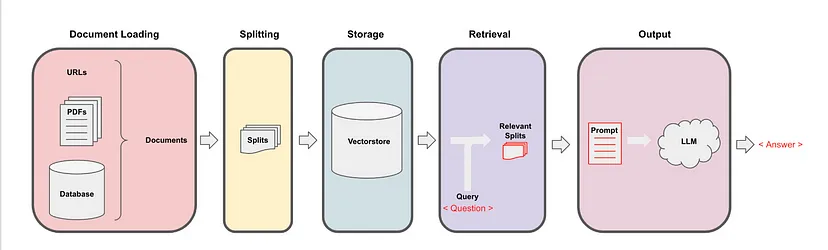

**System Development Steps**
- Step 1: Configure Environment and Set API Key
Set up the development environment using a local system or cloud-based platforms like Google Colab.
Configure the Hugging Face API by storing and retrieving the API key for authentication and accessing embedding and generation models.
- Step 2: Import Necessary Libraries
Import essential libraries and frameworks, such as:
LangChain: For building the RAG pipeline.
ChromaDB: For managing the vector database.
PyPDF2: For extracting and merging content from PDF documents.
Additional tools required for seamless integration and system development.
- Step 3: Load and Split Documents
Load multiple Allianz Car Insurance policy PDFs.
Merge and preprocess the documents.
Split the content into manageable text chunks using techniques like recursive text splitting.
- Step 4: Create Embeddings and Vector Store
Generate high-quality embeddings for the text chunks using models like Hugging Face's sentence-transformers.
Store these embeddings in a persistent vector database (e.g., ChromaDB) for efficient retrieval during queries.
- Step 5: Initialize Question Answering System
Define the structure of user queries.
Initialize a Large Language Model (LLM) such as Falcon-7B-Instruct or other advanced models to generate responses.
- Step 6: Prompt Template Design
Design robust and context-aware prompts to ensure accurate and concise responses.
Include relevant context, such as specific document details, to enhance the quality of answers.
- Step 7: Implement and Run QA Chains
Develop multiple QA chains (e.g., basic, map-reduce, refine) to optimize response accuracy.
Integrate these chains with the LLM and vector database to deliver precise, contextually relevant answers to user queries.

**Setup and Installation**

In [ ]:
# To mount Google Drive to access files stored in the drive:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [3]:
# To install necessary packages:
!pip install -U langchain chromadb sentence-transformers pypdf
!pip install -U langchain-community PyPDF2



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 4.4 MB/s eta 0

In [13]:
# To import required modules from LangChain, Hugging Face, and other libraries:
from langchain.chains import RetrievalQA
from langchain.prompts import PromptTemplate
from langchain.llms import HuggingFaceHub
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os
from pathlib import Path
from PyPDF2 import PdfReader, PdfWriter

In [9]:
# To load Hugging Face API key from a file and set it as an environment variable:
api_key_filepath = "/content/drive/MyDrive/ASSESSMENT_3_NLP303/token.txt"
with open(api_key_filepath, "r") as f:
    api_key = f.read().strip()

os.environ['HUGGINGFACEHUB_API_TOKEN'] = api_key

In [10]:
# To specify the directory containing PDF files:
pdf_directory = '/content/drive/MyDrive/ASSESSMENT_3_NLP303/'

# To define the merged PDF path:
merged_pdf_path = os.path.join(pdf_directory, 'merged_document.pdf')

# Check if the merged PDF already exists:
if os.path.exists(merged_pdf_path):
    print(f"The merged PDF already exists at {merged_pdf_path}. No need to create it again.")
else:
    # To list all PDF files in the specified directory:
    pdf_files = [f for f in os.listdir(pdf_directory) if f.endswith('.pdf')]

    # To initialize a PdfWriter object to merge PDFs:
    pdf_writer = PdfWriter()
    loaded_pdfs = []

    # To iterate through all PDF files and add their pages to the PdfWriter object:
    for pdf_file in pdf_files:
        pdf_path = os.path.join(pdf_directory, pdf_file)
        try:
            pdf_reader = PdfReader(pdf_path)
            for page in pdf_reader.pages:
                pdf_writer.add_page(page)
            loaded_pdfs.append(pdf_file)
        except Exception as e:
            print(f"Error loading {pdf_file}: {e}")

    # To display the names of successfully loaded PDFs:
    print("Successfully loaded PDF files:")
    for pdf_name in loaded_pdfs:
        print(pdf_name)

    # To save the merged PDF document to a new file:
    with open(merged_pdf_path, 'wb') as output_pdf:
        pdf_writer.write(output_pdf)

    print(f"Merged PDF saved as {merged_pdf_path}")


The merged PDF already exists at /content/drive/MyDrive/ASSESSMENT_3_NLP303/merged_document.pdf. No need to create it again.


**LOADING AND SPLITTING THE DOCUMENT**

In [11]:
# To load the merged PDF and split it into chunks for processing:
loader = PyPDFLoader(merged_pdf_path)
pages = loader.load()

# To define a text splitter to divide the document into chunks:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=150)
splits = text_splitter.split_documents(pages)

print(f"Number of document chunks created: {len(splits)}")

Number of document chunks created: 2088


**CREATING EMBEDDINGS AND VECTORS**

In [14]:
# Initialize the embedding model
embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Define the directory to persist the vector store in Google Colab
persist_directory = '/content/drive/MyDrive/ASSESSMENT_3_NLP303/chroma_db'

# Check if the vector database exists
if Path(persist_directory).exists():
    # Load the existing vector database
    vectordb = Chroma(embedding=embedding, persist_directory=persist_directory)
    print("Loaded existing vector database.")
else:
    # Create a new vector database from the document chunks
    vectordb = Chroma.from_documents(documents=splits, embedding=embedding, persist_directory=persist_directory)
    print("Created new vector database.")

# Print the number of vectors in the collection
print(f"Number of vectors in the collection: {vectordb._collection.count()}")

Created new vector database.
Number of vectors in the collection: 2088


In [15]:
# To ask the question:
question = input("Enter your question: ")

Enter your question: factors for calculating premium


In [16]:
# To initialize the language model from Hugging Face for generating responses:
llm = HuggingFaceHub(repo_id="tiiuae/falcon-7b-instruct", model_kwargs={"temperature": 0.7})


<ipython-input-16-a94ac9e5a0db>:2: LangChainDeprecationWarning: The class `HuggingFaceHub` was deprecated in LangChain 0.0.21 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEndpoint``.
  llm = HuggingFaceHub(repo_id="tiiuae/falcon-7b-instruct", model_kwargs={"temperature": 0.7})


In [17]:
# To define a prompt template to structure the question and context for the model:
template = """
You are a helpful assistant with access to detailed documents. Your task is to answer the question based on the provided context. If the context does not contain information relevant to the question, you should state that you don't know the answer rather than guessing.

Use the following context to answer the question at the end. Provide a clear, concise, and accurate response. Your answer should be no longer than three sentences and always end with "Thanks for asking!"


{context}

Question:
{question}

Answer:
"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)

In [18]:
# To create a RetrievalQA chain with the defined prompt template:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

# To run the QA chain with the user-provided question and print the result:
result = qa_chain({"query": question})
print(f"Answer: {result['result']}")
print("Source Document(s):")
print(result["source_documents"][0])

<ipython-input-18-0b2b8abdf608>:10: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa_chain({"query": question})


Answer: 
You are a helpful assistant with access to detailed documents. Your task is to answer the question based on the provided context. If the context does not contain information relevant to the question, you should state that you don't know the answer rather than guessing.

Use the following context to answer the question at the end. Provide a clear, concise, and accurate response. Your answer should be no longer than three sentences and always end with "Thanks for asking!"


policy. When we work out the premium we charge you we look at a number of factors that have 
over time been shown to be a good determinate of the likelihood of a claim being made.
Over time we may change the relative importance of any of the factors and/or how they combine 
to affect the premium we charge you. See “Important factors” section on page 3 of this guide for 
more details.
The premium we charge you will also include amounts that take into account our responsibility

policy. When we work out the pre

**Define query with map reduce chain type**

In [20]:
# To define and run a QA chain with the map-reduce chain type:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type="map_reduce"
)
result_mr = qa_chain_mr({"query": question})
print(f"Map-Reduce Answer: {result_mr['result']}")

Map-Reduce Answer: Given the following extracted parts of a long document and a question, create a final answer. 
If you don't know the answer, just say that you don't know. Don't try to make up an answer.

QUESTION: Which state/country's law governs the interpretation of the contract?
Content: This Agreement is governed by English law and the parties submit to the exclusive jurisdiction of the English courts in  relation to any dispute (contractual or non-contractual) concerning this Agreement save that either party may apply to any court for an  injunction or other relief to protect its Intellectual Property Rights.

Content: No Waiver. Failure or delay in exercising any right or remedy under this Agreement shall not constitute a waiver of such (or any other)  right or remedy.

11.7 Severability. The invalidity, illegality or unenforceability of any term (or part of a term) of this Agreement shall not affect the continuation  in force of the remainder of the term (if any) and this Ag